In [1]:
import scipy
import numpy as np
import pandas as pd
from tqdm import tqdm

from scipy.stats import pearsonr
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.interpolate import interp1d

from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

import matplotlib
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

In [2]:
def hyperbolic(theta, lamda, t):
    return theta/(1 + lamda*t)

def exponential(theta, lamda, t):
    return theta*np.exp(-lamda*t)

In [3]:
def plot_thresholds(hyp_speed, hyp_accuracy, exp_speed, exp_accuracy, file_name):
    fig = plt.figure(figsize=(10, 6), layout='constrained')
    fig.suptitle('Estimated thresholds for NDT-informed CT-DDMs in Study 1\n', size=15) # or plt.suptitle('Main title')


    plt.subplot(221)
    t= np.linspace(0, 3, 100)
    plt.title('Speed condition')
    for i in range(hyp_speed.shape[0]):
        plt.plot(t, hyperbolic(hyp_speed['b0'][i], hyp_speed['lambda'][i], t), c='gray', alpha=0.3);
        plt.plot(t, hyperbolic(-hyp_speed['b0'][i], hyp_speed['lambda'][i], t), c='gray', alpha=0.3);

    plt.plot(t, hyperbolic(hyp_speed['b0'].mean(), hyp_speed['lambda'].mean(), t), linewidth=2, c='green');
    plt.plot(t, hyperbolic(-hyp_speed['b0'].mean(), hyp_speed['lambda'].mean(), t), linewidth=2, c='green');
    plt.ylabel('Hyperbolic threshold')
    plt.ylim(-3.4, 3.4)

    plt.subplot(222)
    plt.title('Accuracy condition')
    for i in range(hyp_accuracy.shape[0]):
        plt.plot(t, hyperbolic(hyp_accuracy['b0'][i], hyp_accuracy['lambda'][i], t), c='gray', alpha=0.3);
        plt.plot(t, hyperbolic(-hyp_accuracy['b0'][i], hyp_accuracy['lambda'][i], t), c='gray', alpha=0.3);

    plt.plot(t, hyperbolic(hyp_accuracy['b0'].mean(), hyp_accuracy['lambda'].mean(), t), linewidth=2, c='green');
    plt.plot(t, hyperbolic(-hyp_accuracy['b0'].mean(), hyp_accuracy['lambda'].mean(), t), linewidth=2, c='green');  
    plt.ylim(-3.4, 3.4)
    
    plt.subplot(223)
    for i in range(exp_speed.shape[0]):
        plt.plot(t, exponential(exp_speed['b0'][i], exp_speed['lambda'][i], t), c='gray', alpha=0.3);
        plt.plot(t, exponential(-exp_speed['b0'][i], exp_speed['lambda'][i], t), c='gray', alpha=0.3);

    plt.plot(t, exponential(exp_speed['b0'].mean(), exp_speed['lambda'].mean(), t), linewidth=2, c='green');
    plt.plot(t, exponential(-exp_speed['b0'].mean(), exp_speed['lambda'].mean(), t), linewidth=2, c='green');  
    plt.xlabel('Time')
    plt.ylabel('Exponential threshold')
    plt.ylim(-2.4, 2.4)

    plt.subplot(224)
    for i in range(exp_accuracy.shape[0]):
        plt.plot(t, exponential(exp_accuracy['b0'][i], exp_accuracy['lambda'][i], t), c='gray', alpha=0.3);
        plt.plot(t, exponential(-exp_accuracy['b0'][i], exp_accuracy['lambda'][i], t), c='gray', alpha=0.3);

    plt.plot(t, exponential(exp_accuracy['b0'].mean(), exp_accuracy['lambda'].mean(), t), linewidth=2, c='green');
    plt.plot(t, exponential(-exp_accuracy['b0'].mean(), exp_accuracy['lambda'].mean(), t), linewidth=2, c='green');  
    plt.xlabel('Time');
    plt.ylim(-2.4, 2.4)
    
    plt.savefig(file_name, 
                transparent=True, 
                dpi=600, 
                bbox_inches='tight');

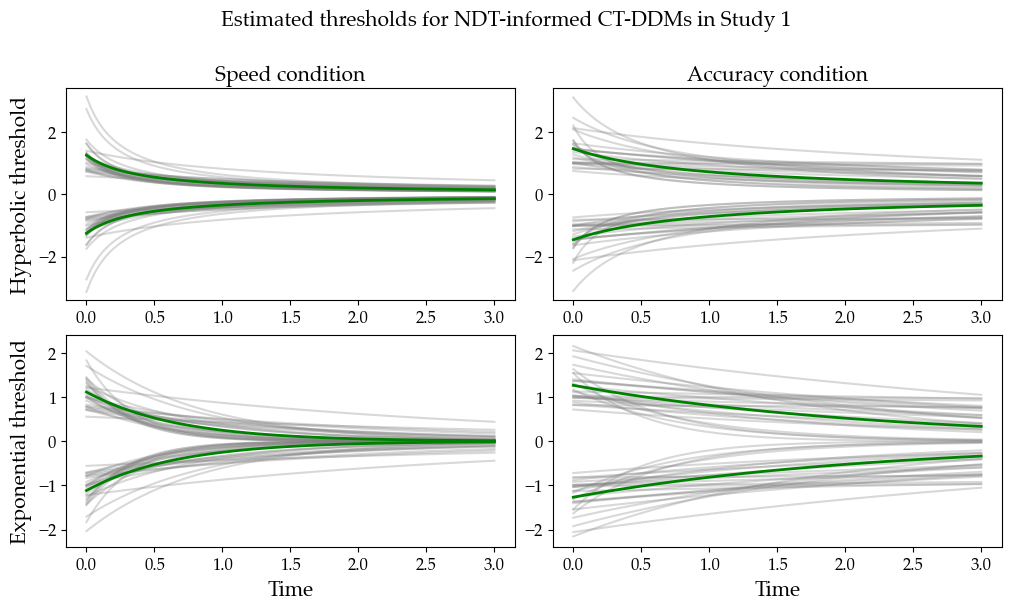

In [4]:
# NDT-informed parameters
hyp_speed = pd.read_csv('_prms/hyp_speed.csv')
hyp_accuracy = pd.read_csv('_prms/hyp_accuracy.csv')
exp_speed = pd.read_csv('_prms/exp_speed.csv')
exp_accuracy = pd.read_csv('_prms/exp_accuracy.csv')

plot_thresholds(hyp_speed, hyp_accuracy, exp_speed, exp_accuracy, 'thresholds_ndt_informed_s1.pdf')

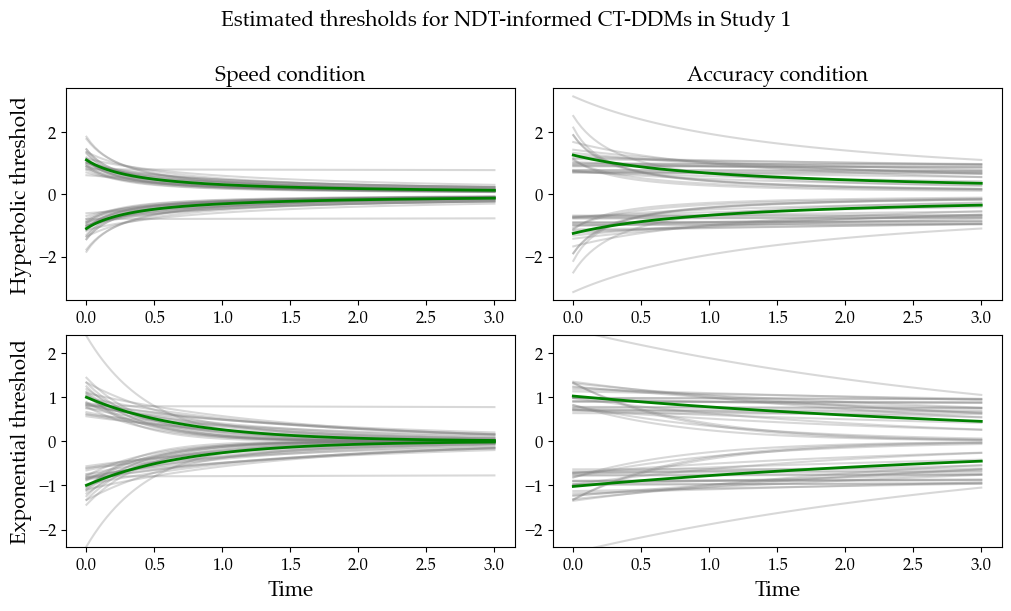

In [5]:
hyp_speed = pd.read_csv('_prms/bhyp_speed.csv')
hyp_accuracy = pd.read_csv('_prms/bhyp_accuracy.csv')
exp_speed = pd.read_csv('_prms/bexp_speed.csv')
exp_accuracy = pd.read_csv('_prms/bexp_accuracy.csv')

plot_thresholds(hyp_speed, hyp_accuracy, exp_speed, exp_accuracy, 'thresholds_uninformed_s1.pdf')